<a href="https://colab.research.google.com/github/vicentegilso/clasificaciondeimagenes/blob/main/Workshop_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 3: CNN state of the art

In this workshop we will learn techniques to increase the performance of CNN and how to use state of the art architectures. The structure of the workshop will be the following:



1.   Dropout
2.   Batch Normalization
3.   Data Augmentation
4.   Transfer learning



## 1. Dropout

In [1]:
# Import dependence for downloading CIFAR10
from keras.datasets import cifar10 

In [2]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
# Import dependence for handling arrays
import numpy as np

In [4]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl = X_train.astype('float32')
X_testval_fl = X_testval.astype('float32')
X_train_fl /= 255
X_testval_fl /= 255

In [5]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [6]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(X_train.shape[0], 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(X_testval.shape[0], 1)).toarray()

In [7]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [8]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [9]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 32, 32, 3)
Testing matrix shape: (5000, 32, 32, 3)


In [10]:
# Import depence for CNN
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [11]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(10, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [12]:
# Show a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0     

In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=50, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/50
391/391 [==============================] - 35s 7ms/step - loss: 2.0260 - accuracy: 0.2524 - val_loss: 1.5450 - val_accuracy: 0.4306
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.5409 - accuracy: 0.4290 - val_loss: 1.3967 - val_accuracy: 0.4952
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.4339 - accuracy: 0.4794 - val_loss: 1.3033 - val_accuracy: 0.5288
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3517 - accuracy: 0.5122 - val_loss: 1.2601 - val_accuracy: 0.5520
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2920 - accuracy: 0.5381 - val_loss: 1.1984 - val_accuracy: 0.5782
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2412 - accuracy: 0.5544 - val_loss: 1.1966 - val_accuracy: 0.5788
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2129 - accuracy: 0.5674 - val_loss: 1.1684 - val_accuracy: 0.5874
Epoch

In [ ]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt

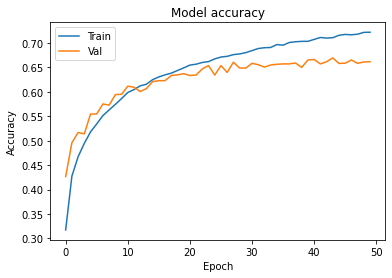

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
# plt.ylim(0, 1)
plt.show()

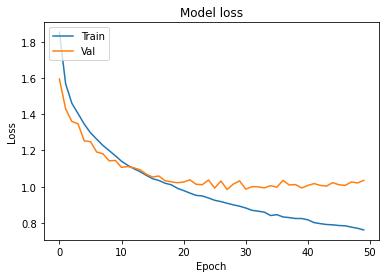

In [ ]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

## 2. Batch Normalization

In [32]:
from keras.layers import BatchNormalization
from keras.optimizers import Adam

In [ ]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
bn_1 = BatchNormalization()(conv_layer_1)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(bn_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
bn_2 = BatchNormalization()(conv_layer_2)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(bn_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
bn_3 = BatchNormalization()(conv_layer_3)
flatten_layer = Flatten()(bn_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(10, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 2.0122 - accuracy: 0.3194 - val_loss: 1.8713 - val_accuracy: 0.3478
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.3685 - accuracy: 0.5088 - val_loss: 1.2988 - val_accuracy: 0.5450
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2170 - accuracy: 0.5650 - val_loss: 1.4490 - val_accuracy: 0.5052
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1340 - accuracy: 0.5954 - val_loss: 1.1385 - val_accuracy: 0.5876
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.0851 - accuracy: 0.6191 - val_loss: 1.0462 - val_accuracy: 0.6316
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.0354 - accuracy: 0.6300 - val_loss: 1.1476 - val_accuracy: 0.6020
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 0.9893 - accuracy: 0.6495 - val_loss: 1.1001 - val_accuracy: 0.6126
Epoch 

In [ ]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 1.4178 - accuracy: 0.5138 - val_loss: 1.6915 - val_accuracy: 0.4800
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1125 - accuracy: 0.6114 - val_loss: 1.1555 - val_accuracy: 0.6024
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.0316 - accuracy: 0.6370 - val_loss: 1.1446 - val_accuracy: 0.5988
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.0058 - accuracy: 0.6461 - val_loss: 1.7267 - val_accuracy: 0.4510
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 0.9673 - accuracy: 0.6588 - val_loss: 1.0988 - val_accuracy: 0.6274
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 0.9538 - accuracy: 0.6670 - val_loss: 1.1695 - val_accuracy: 0.5926
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 0.9199 - accuracy: 0.6777 - val_loss: 1.2536 - val_accuracy: 0.5978
Epoch 

## 3. Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define data generator
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 10,
)

In [ ]:
# Function to convert a categorical class to its corresponding string
def class_to_string(class_int):
    classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
    return classes[class_int]

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for 
                                          # appropriate visualization

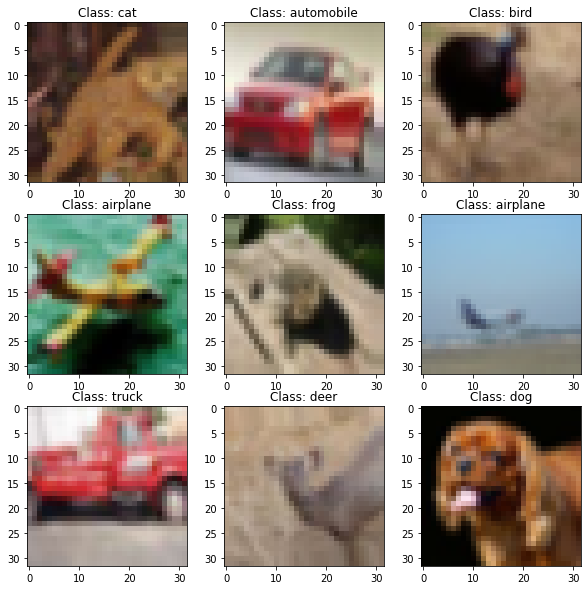

In [ ]:
# Show generated data
iterator = train_datagen.flow(X_train_fl, y_train_oh, batch_size=9)
samples, labels = next(iterator)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(samples[i], interpolation='none')
    class_str = class_to_string(np.argmax(labels[i]))
    plt.title("Class: " + class_str)

In [ ]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=20,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 22s 42ms/step - loss: 1.0730 - accuracy: 0.6369 - val_loss: 0.9021 - val_accuracy: 0.7030
Epoch 2/20
500/500 [==============================] - 21s 41ms/step - loss: 0.9916 - accuracy: 0.6593 - val_loss: 0.9643 - val_accuracy: 0.6844
Epoch 3/20
500/500 [==============================] - 21s 41ms/step - loss: 0.9574 - accuracy: 0.6725 - val_loss: 0.8446 - val_accuracy: 0.7114
Epoch 4/20
500/500 [==============================] - 20s 41ms/step - loss: 0.9465 - accuracy: 0.6741 - val_loss: 0.9034 - val_accuracy: 0.6986
Epoch 5/20
500/500 [==============================] - 20s 41ms/step - loss: 0.9380 - accuracy: 0.6742 - val_loss: 0.9091 - val_accuracy: 0.6976
Epoch 6/20
500/500 [==============================] - 20s 41ms/step - loss: 0.9338 - accuracy: 0.6785 - val_loss: 0.9269 - val_accuracy: 0.6980
Epoch 7/20
500/500 [==============================] - 21s 41ms/step - loss: 0.9208 - accuracy: 0.6798 - val_loss: 0.8296 - val_accuracy:

In [ ]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=100,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

Epoch 1/100
  3/500 [..............................] - ETA: 20s - loss: 0.8548 - accuracy: 0.6933

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


500/500 [==============================] - 21s 42ms/step - loss: 0.8692 - accuracy: 0.6958 - val_loss: 0.8258 - val_accuracy: 0.7176
Epoch 2/100
500/500 [==============================] - 21s 41ms/step - loss: 0.8750 - accuracy: 0.6970 - val_loss: 0.8469 - val_accuracy: 0.7142
Epoch 3/100
500/500 [==============================] - 21s 42ms/step - loss: 0.8727 - accuracy: 0.6964 - val_loss: 0.8996 - val_accuracy: 0.7050
Epoch 4/100
500/500 [==============================] - 20s 41ms/step - loss: 0.8633 - accuracy: 0.6999 - val_loss: 0.8129 - val_accuracy: 0.7200
Epoch 5/100
500/500 [==============================] - 21s 42ms/step - loss: 0.8607 - accuracy: 0.7003 - val_loss: 0.8292 - val_accuracy: 0.7170
Epoch 6/100
500/500 [==============================] - 21s 42ms/step - loss: 0.8608 - accuracy: 0.7008 - val_loss: 0.8856 - val_accuracy: 0.7050
Epoch 7/100
500/500 [==============================] - 21s 41ms/step - loss: 0.8646 - accuracy: 0.6994 - val_loss: 0.8282 - val_accuracy: 0.71

## 4. Transfer Learning

In [36]:
# Import dependences for transfer learning
from keras.applications import Xception
from keras.models import Sequential
from keras.layers import UpSampling2D
from keras.optimizers import RMSprop

In [37]:
# Define the model
resnet_model = Xception(weights='imagenet', include_top=False, 
                        input_shape=(256, 256, 3))
model = Sequential()
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(resnet_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

83689472/83683744 [==============================] - 1s 0us/step


In [38]:
# Compile the model
model.compile(optimizer=RMSprop(lr=2e-5), loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=5, batch_size=50, 
                    validation_data=(X_val, y_val))

Epoch 1/5
 243/1000 [======>.......................] - ETA: 15:49 - loss: 2.2815 - acc: 0.2613

In [ ]:
# Train the model
batch_size = 20
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=5,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
2500/2500 [==============================] - 742s 293ms/step - loss: 0.5687 - acc: 0.8554 - val_loss: 0.2378 - val_acc: 0.9338
Epoch 2/5
2500/2500 [==============================] - 731s 292ms/step - loss: 0.4999 - acc: 0.8745 - val_loss: 0.2294 - val_acc: 0.9340
Epoch 3/5
2500/2500 [==============================] - 732s 293ms/step - loss: 0.4551 - acc: 0.8867 - val_loss: 0.2056 - val_acc: 0.9438
Epoch 4/5
2500/2500 [==============================] - 733s 293ms/step - loss: 0.4077 - acc: 0.8989 - val_loss: 0.2058 - val_acc: 0.9426
Epoch 5/5
2500/2500 [==============================] - 733s 293ms/step - loss: 0.3646 - acc: 0.9106 - val_loss: 0.1697 - val_acc: 0.9480


# Exercise 1: Experiment with other pre-trained models to evaluate results

# Exercise 2: Use the concepts learnt to train a classifier for CIFAR100 dataset